<a href="https://colab.research.google.com/github/coding-cosmos/Radial-Gate-Cavitation-Index/blob/main/Radial_Gate_Uncertainty_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo



## Utils

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monte Carlo simulation function
def monte_carlo_simulation(data, observed_col, predicted_col, num_simulations=1000):
    """
    Perform Monte Carlo simulation to calculate uncertainty bounds.

    Parameters:
    - data: DataFrame containing observed and predicted values.
    - observed_col: Column name for observed values.
    - predicted_col: Column name for predicted values.
    - num_simulations: Number of Monte Carlo simulations to run.

    Returns:
    - results: DataFrame with observed values, mean predictions, lower and upper bounds of 95%PPU.
    """
    observed = data[observed_col]
    predicted = data[predicted_col]

    # Generate random noise based on the standard deviation of residuals
    residuals = observed - predicted
    noise = np.random.normal(loc=0, scale=np.std(residuals), size=(num_simulations, len(predicted)))

    # Perform Monte Carlo simulations
    simulated_predictions = predicted.values + noise

    # Calculate statistics
    lower_bound = np.percentile(simulated_predictions, 2.5, axis=0)
    upper_bound = np.percentile(simulated_predictions, 97.5, axis=0)
    mean_prediction = np.mean(simulated_predictions, axis=0)

    # Combine results into a DataFrame
    results = pd.DataFrame({
        'Observed': observed,
        'Mean_Prediction': mean_prediction,
        'Lower_95PPU': lower_bound,
        'Upper_95PPU': upper_bound
    })

    return results

# Calculate P-factor, R-factor, d-bar, and 95% PPU average width
def calculate_uncertainty_metrics(results):
    """
    Calculate P-factor, R-factor, d-bar (average width), and 95% PPU for uncertainty analysis.

    Parameters:
    - results: DataFrame containing observed values, mean predictions, and 95%PPU bounds.

    Returns:
    - metrics: Dictionary containing P-factor, R-factor, d-bar, and 95% PPU.
    """
    observed = results['Observed']
    lower_bound = results['Lower_95PPU']
    upper_bound = results['Upper_95PPU']

    # P-factor: Percentage of observed values within 95%PPU
    within_bounds = (observed >= lower_bound) & (observed <= upper_bound)
    p_factor = within_bounds.mean()

    # R-factor: Average thickness of 95%PPU divided by the standard deviation of observed data
    r_factor = np.mean(upper_bound - lower_bound) / np.std(observed)

    # d-bar: Average width of 95%PPU
    d_bar = np.mean(upper_bound - lower_bound)

    metrics = {
        'P-factor': p_factor,
        'R-factor': r_factor,
        'd-bar': d_bar,
        '95% PPU': d_bar  # Using d-bar as the width of the uncertainty band
    }

    return metrics


# Rank models based on R-factor and 95% PPU
def rank_models(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict).T  # Transpose for easier handling
    metrics_df = metrics_df.sort_values(by=['R-factor', '95% PPU'])
    metrics_df['Rank'] = range(1, len(metrics_df) + 1)
    return metrics_df


def run_mc(data,models):

  # Perform Monte Carlo simulations and calculate metrics for all models
  results_dict = {}
  metrics_dict = {}

  for model in models:
      print(f"Processing model: {model}")
      # Perform Monte Carlo simulation
      results = monte_carlo_simulation(data, observed_col='sigma', predicted_col=model)
      results_dict[model] = results

      # Calculate uncertainty metrics
      metrics = calculate_uncertainty_metrics(results)
      metrics_dict[model] = metrics

      # Visualization
      plt.fill_between(range(len(results['Observed'])), results['Lower_95PPU'], results['Upper_95PPU'], color='navy', alpha=0.5, label='95PPU')
      plt.plot(range(len(results['Observed'])), results['Observed'], 'r-', label='Observed $cd$')
      plt.plot(range(len(results['Observed'])), results['Mean_Prediction'], 'b--', label='Mean Prediction')
      plt.title(f'{model}', fontsize=14, fontweight='bold')
      plt.xlabel('Number of datasets', fontsize=12)
      plt.ylabel(r'$cd$', fontsize=12)
      plt.xticks(fontsize=10)
      plt.yticks(fontsize=10)
      plt.legend(loc='upper right', fontsize=10)
      plt.tight_layout()
      plt.show()

  # Get ranked models
  ranked_models = rank_models(metrics_dict)

  # Output metrics for all models
  for model, metrics in metrics_dict.items():
      print(f"\nUncertainty Metrics for {model} Model:")
      print(metrics)

  # Display ranked models
  print("\nRanked Models Based on R-factor and 95% PPU:")
  print(ranked_models)

## Dimensional

### Training Data

Processing model: gbm


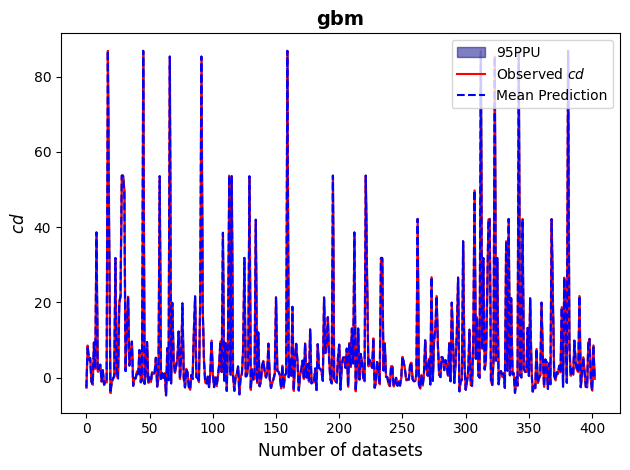

Processing model: xgb


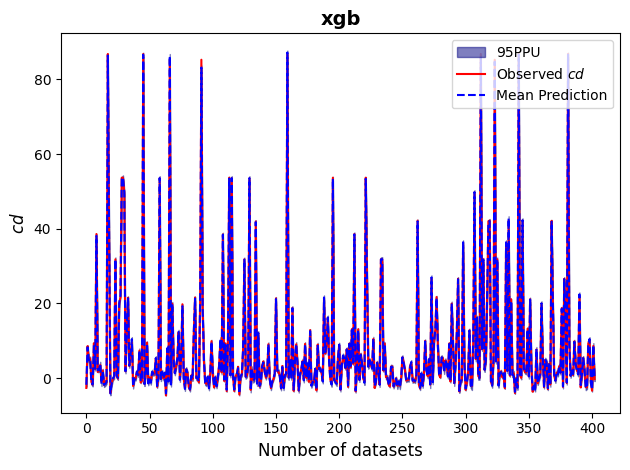

Processing model: rf


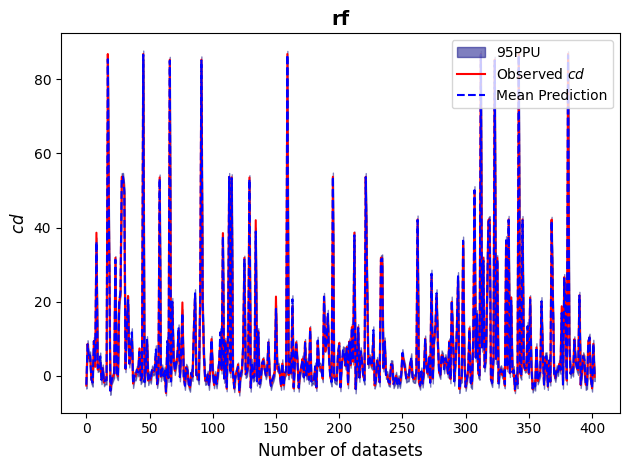

Processing model: catb


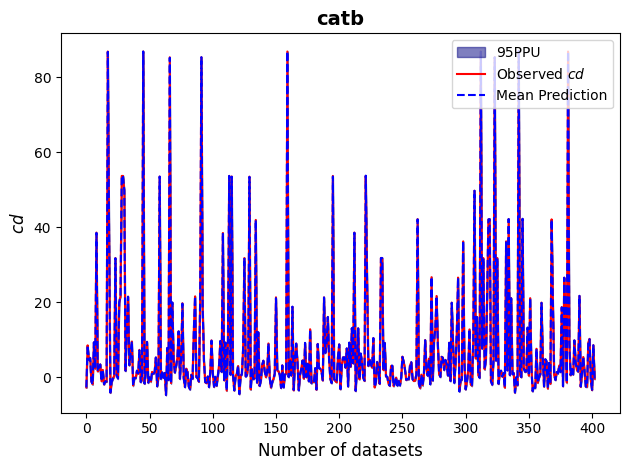

Processing model: xrt


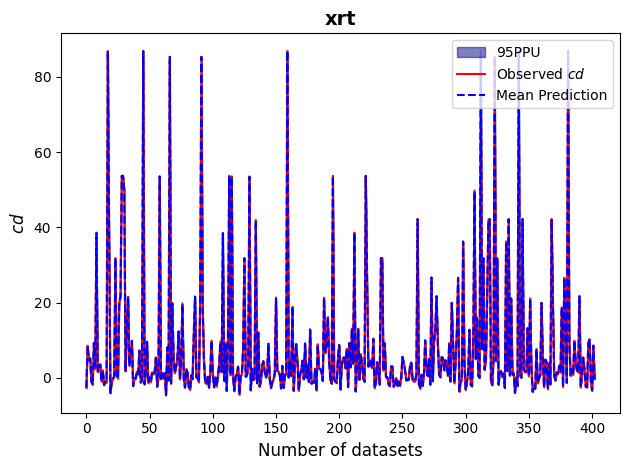


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9454094292803971), 'R-factor': np.float64(0.0054604201889646865), 'd-bar': np.float64(0.09228958122920802), '95% PPU': np.float64(0.09228958122920802)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9503722084367245), 'R-factor': np.float64(0.06253751226462771), 'd-bar': np.float64(1.0569810780648474), '95% PPU': np.float64(1.0569810780648474)}

Uncertainty Metrics for rf Model:
{'P-factor': np.float64(0.9429280397022333), 'R-factor': np.float64(0.1269024832954551), 'd-bar': np.float64(2.1448490473229875), '95% PPU': np.float64(2.1448490473229875)}

Uncertainty Metrics for catb Model:
{'P-factor': np.float64(0.9429280397022333), 'R-factor': np.float64(0.014519997844492538), 'd-bar': np.float64(0.24541051313695628), '95% PPU': np.float64(0.24541051313695628)}

Uncertainty Metrics for xrt Model:
{'P-factor': np.float64(0.9503722084367245), 'R-factor': np.float64(0.01416843179580585), 'd-bar': np.float64(0.239468

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','rf','catb','xrt']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_training.csv')
run_mc(data,models)

### Testing Data

Processing model: gbm


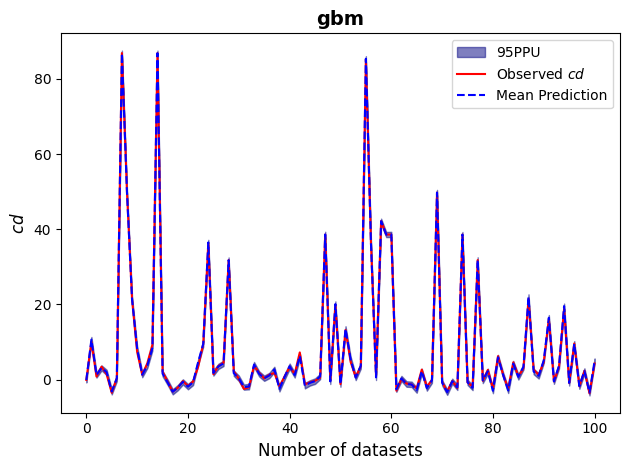

Processing model: xgb


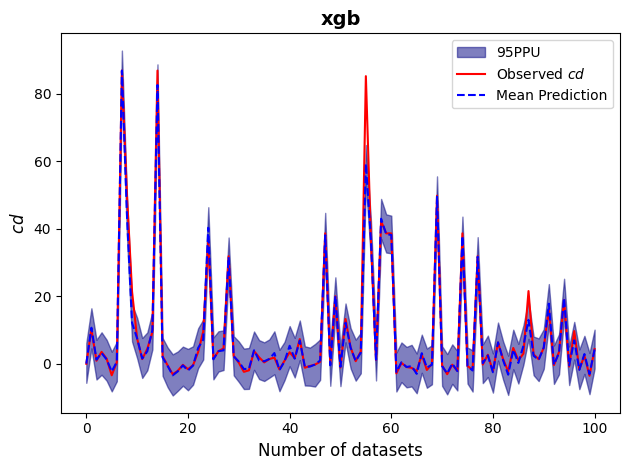

Processing model: rf


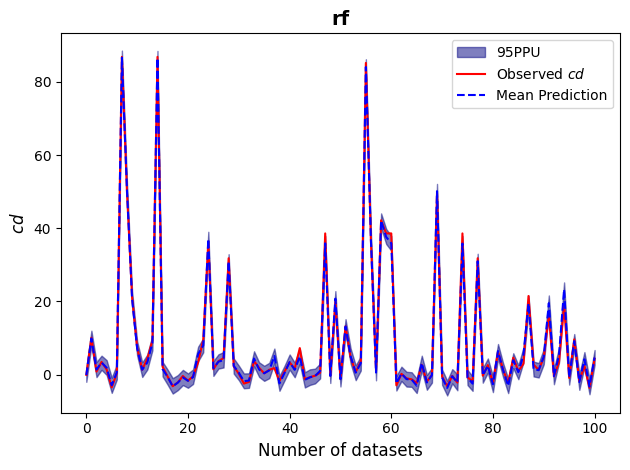

Processing model: catb


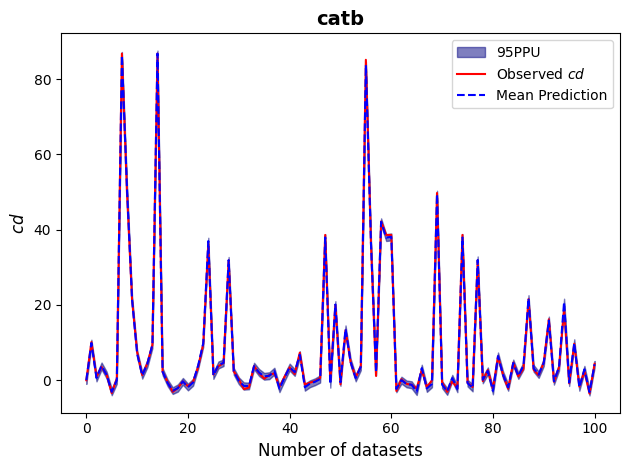

Processing model: xrt


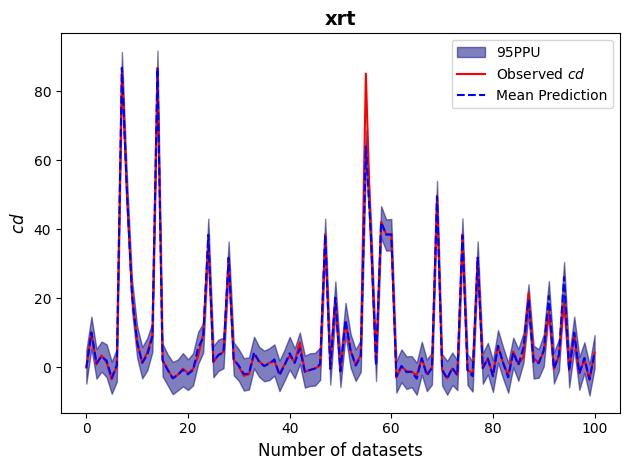


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9405940594059405), 'R-factor': np.float64(0.07628281352767174), 'd-bar': np.float64(1.4139877824892562), '95% PPU': np.float64(1.4139877824892562)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9603960396039604), 'R-factor': np.float64(0.6335728897455707), 'd-bar': np.float64(11.743986410407803), '95% PPU': np.float64(11.743986410407803)}

Uncertainty Metrics for rf Model:
{'P-factor': np.float64(0.9108910891089109), 'R-factor': np.float64(0.2181327787341126), 'd-bar': np.float64(4.043336497788998), '95% PPU': np.float64(4.043336497788998)}

Uncertainty Metrics for catb Model:
{'P-factor': np.float64(0.9504950495049505), 'R-factor': np.float64(0.09774191883110728), 'd-bar': np.float64(1.8117564451671382), '95% PPU': np.float64(1.8117564451671382)}

Uncertainty Metrics for xrt Model:
{'P-factor': np.float64(0.9801980198019802), 'R-factor': np.float64(0.4959881552765575), 'd-bar': np.float64(9.193698546082476),

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','rf','catb','xrt']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_testing.csv')
run_mc(data,models)

## Non dimensional

### Training data

Processing model: gbm


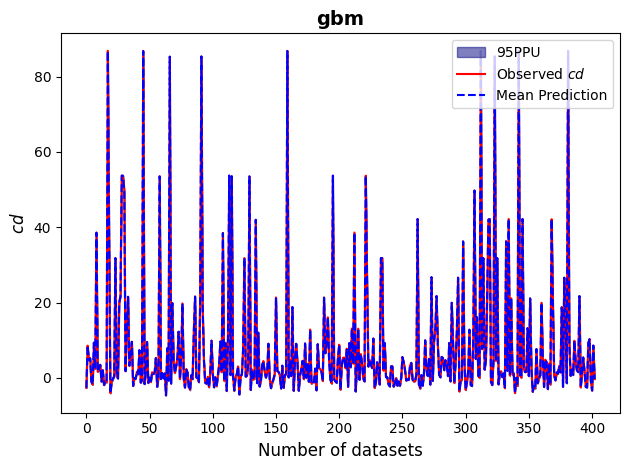

Processing model: xgb


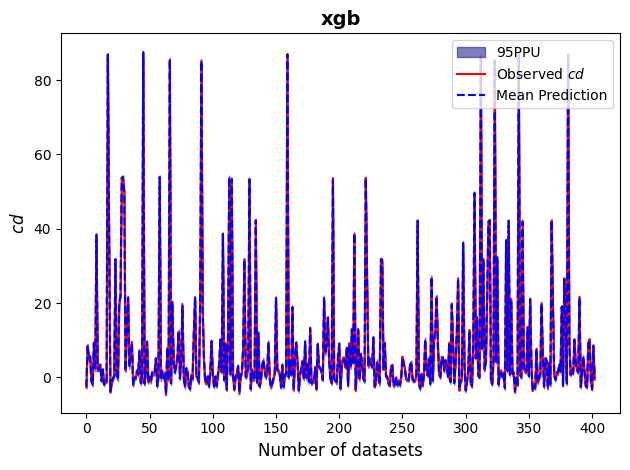

Processing model: catb


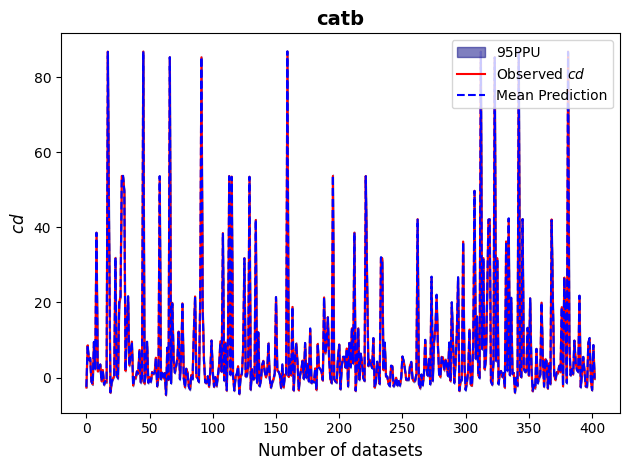

Processing model: xrt


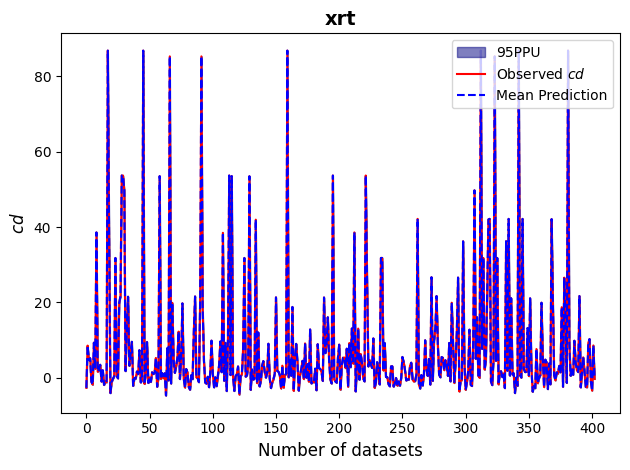

Processing model: rf


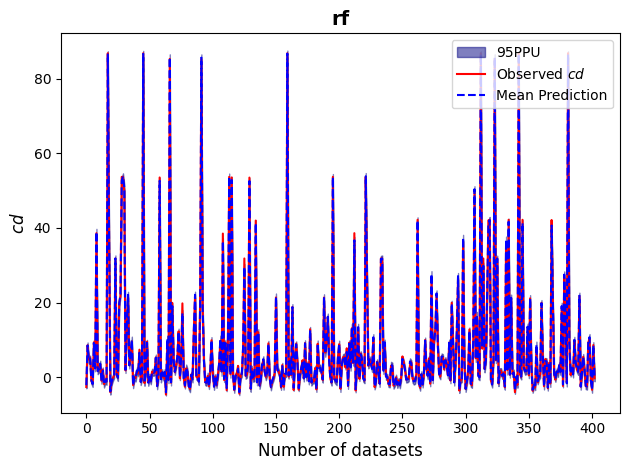


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9429280397022333), 'R-factor': np.float64(0.006571212661592042), 'd-bar': np.float64(0.11106369907796139), '95% PPU': np.float64(0.11106369907796139)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9379652605459057), 'R-factor': np.float64(0.05404129341807676), 'd-bar': np.float64(0.9133817849253641), '95% PPU': np.float64(0.9133817849253641)}

Uncertainty Metrics for catb Model:
{'P-factor': np.float64(0.9602977667493796), 'R-factor': np.float64(0.024821258459831463), 'd-bar': np.float64(0.4195178153998649), '95% PPU': np.float64(0.4195178153998649)}

Uncertainty Metrics for xrt Model:
{'P-factor': np.float64(0.9156327543424317), 'R-factor': np.float64(0.00023277440962791014), 'd-bar': np.float64(0.003934249021504174), '95% PPU': np.float64(0.003934249021504174)}

Uncertainty Metrics for rf Model:
{'P-factor': np.float64(0.9404466501240695), 'R-factor': np.float64(0.09720099364075119), 'd-bar': np.float64(1.6

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','catb','xrt','rf']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ndim_training.csv')
run_mc(data,models)

### Testing Data

Processing model: gbm


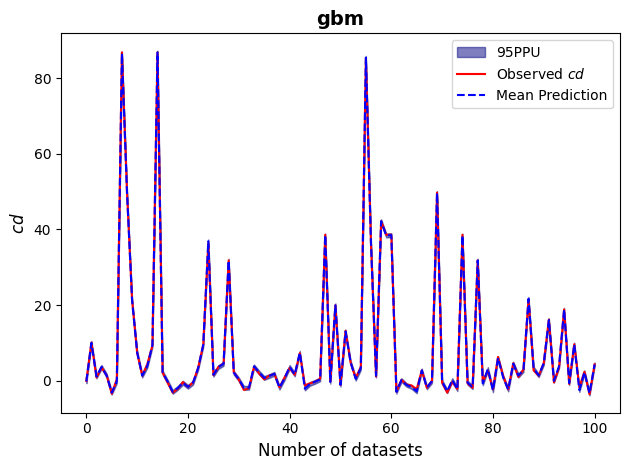

Processing model: xgb


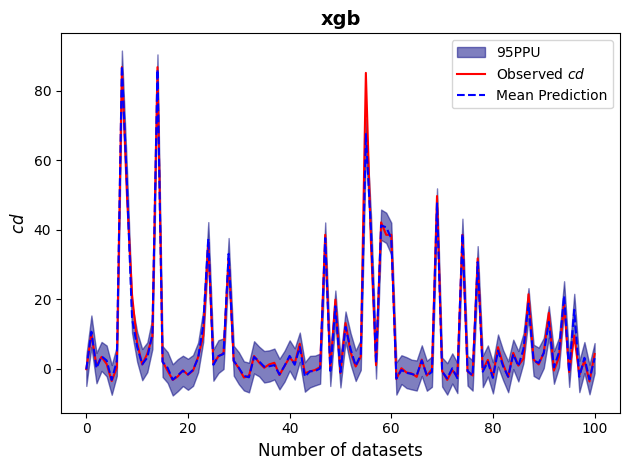

Processing model: catb


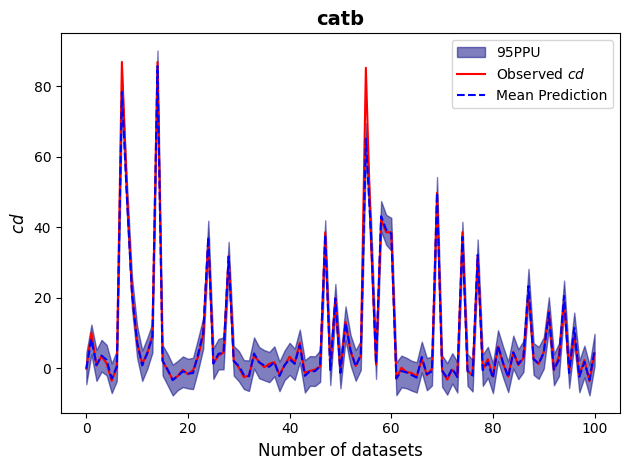

Processing model: xrt


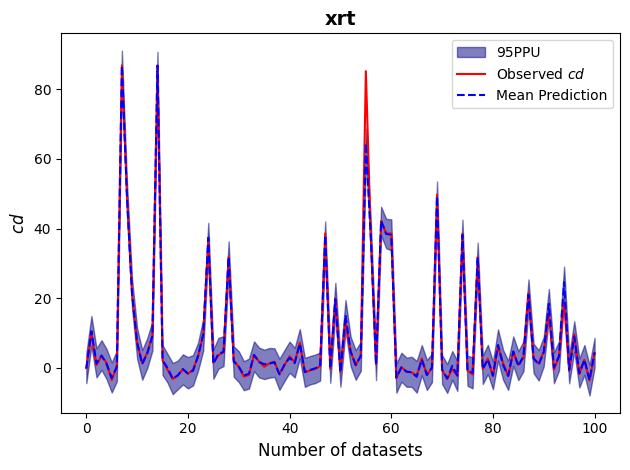

Processing model: rf


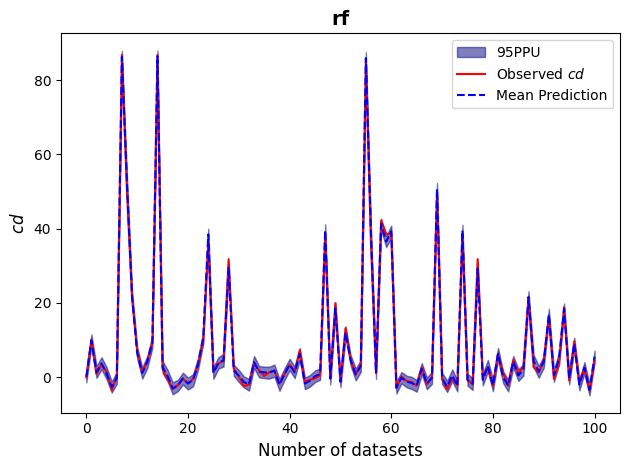


Uncertainty Metrics for gbm Model:
{'P-factor': np.float64(0.9207920792079208), 'R-factor': np.float64(0.05322927388152427), 'd-bar': np.float64(0.9866644852047448), '95% PPU': np.float64(0.9866644852047448)}

Uncertainty Metrics for xgb Model:
{'P-factor': np.float64(0.9702970297029703), 'R-factor': np.float64(0.47524897496076146), 'd-bar': np.float64(8.809274503113222), '95% PPU': np.float64(8.809274503113222)}

Uncertainty Metrics for catb Model:
{'P-factor': np.float64(0.9801980198019802), 'R-factor': np.float64(0.4726390691179651), 'd-bar': np.float64(8.760896961639576), '95% PPU': np.float64(8.760896961639576)}

Uncertainty Metrics for xrt Model:
{'P-factor': np.float64(0.9801980198019802), 'R-factor': np.float64(0.4603442784885219), 'd-bar': np.float64(8.532999183170908), '95% PPU': np.float64(8.532999183170908)}

Uncertainty Metrics for rf Model:
{'P-factor': np.float64(0.9306930693069307), 'R-factor': np.float64(0.1705449641397862), 'd-bar': np.float64(3.1612428082670143), '9

In [ ]:
 # Models to analyze
models = ['gbm', 'xgb','catb','xrt','rf']
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ndim_testing.csv')
run_mc(data,models)

# Bootstrap

## Utils

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Bootstrap simulation function
def bootstrap_simulation(X_train, y_train, X_test, y_test, model_fn, n_iter=1000):
    """
    Perform bootstrap simulation to calculate uncertainty bounds and metrics.

    Parameters:
    - X_train, y_train: Training data.
    - X_test: Test data to predict on.
    - y_test: True target values for X_test (observed values).
    - model_fn: A function that returns a new model instance.
    - n_iter: Number of bootstrap iterations.

    Returns:
    - results: DataFrame with observed, mean prediction, lower and upper 95%PPU bounds.
    """
    predictions = []

    for _ in range(n_iter):
        X_sample, y_sample = resample(X_train, y_train, replace=True)
        model = model_fn()
        model.fit(X_sample, y_sample)
        preds = model.predict(X_test)
        predictions.append(preds)

    predictions = np.array(predictions)
    mean_preds = np.mean(predictions, axis=0)
    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)

    results = pd.DataFrame({
        'Observed': y_test,
        'Mean_Prediction': mean_preds,
        'Lower_95PPU': lower_bound,
        'Upper_95PPU': upper_bound
    })

    return results


# Metrics calculation (same as MC version)
def calculate_uncertainty_metrics(results):
    observed = results['Observed']
    lower_bound = results['Lower_95PPU']
    upper_bound = results['Upper_95PPU']

    within_bounds = (observed >= lower_bound) & (observed <= upper_bound)
    p_factor = within_bounds.mean()
    r_factor = np.mean(upper_bound - lower_bound) / np.std(observed)
    d_bar = np.mean(upper_bound - lower_bound)

    return {
        'P-factor': p_factor,
        'R-factor': r_factor,
        'd-bar': d_bar,
        '95% PPU': d_bar
    }


# Rank models
def rank_models(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict).T
    metrics_df = metrics_df.sort_values(by=['R-factor', '95% PPU'])
    metrics_df['Rank'] = range(1, len(metrics_df) + 1)
    return metrics_df


# Main Bootstrap Runner
def run_bootstrap(X_train, y_train, X_test, y_test, model_dict, n_iter=1000):
    results_dict = {}
    metrics_dict = {}

    for model_name, model_fn in model_dict.items():
        print(f"Processing model: {model_name}")

        results = bootstrap_simulation(X_train, y_train, X_test, y_test, model_fn, n_iter)
        results_dict[model_name] = results

        metrics = calculate_uncertainty_metrics(results)
        metrics_dict[model_name] = metrics

        # Visualization
        plt.fill_between(range(len(results['Observed'])), results['Lower_95PPU'], results['Upper_95PPU'],
                         color='teal', alpha=0.3, label='95% PPU')
        plt.plot(range(len(results['Observed'])), results['Observed'], 'r-', label='Observed')
        plt.plot(range(len(results['Observed'])), results['Mean_Prediction'], 'b--', label='Mean Prediction')
        plt.title(f'{model_name}', fontsize=14, fontweight='bold')
        plt.xlabel('Sample Index', fontsize=12)
        plt.ylabel('Prediction', fontsize=12)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

    # Rank models
    ranked_models = rank_models(metrics_dict)

    # Print metrics
    for model, metrics in metrics_dict.items():
        print(f"\nUncertainty Metrics for {model} Model:")
        print(metrics)

    print("\nRanked Models Based on R-factor and 95% PPU:")
    print(ranked_models)


In [ ]:
params_gbm_20 =  {'n_estimators': 470, 'max_depth': 6, 'learning_rate': 0.05148810384435254, 'subsample': 0.939879106935373, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None}
params_xgb_20 =  {'n_estimators': 474, 'max_depth': 9, 'learning_rate': 0.29787739449223777, 'subsample': 0.9615035752763753, 'colsample_bytree': 0.7162874323190875, 'gamma': 0.479575241737767, 'reg_alpha': 0.02176590366042399, 'reg_lambda': 0.0828552712757255}
params_catb_20 =  {'iterations': 475, 'depth': 8, 'learning_rate': 0.12760508328206074, 'l2_leaf_reg': 6.147645152771797, 'bagging_temperature': 0.9768427864973606, 'random_strength': 0.028282687916864738}
params_xrt_20 = {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}
params_rf_20 =  {'n_estimators': 475, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}


models = {
    'GBM': lambda: GradientBoostingRegressor(**params_gbm_20),
    'XGB': lambda: XGBRegressor(**params_xgb_20),
    'CATB': lambda: CatBoostRegressor(**params_catb_20),
    'XRT': lambda: ExtraTreesRegressor(**params_xrt_20),
    'RF': lambda: RandomForestRegressor(**params_rf_20),
}

## Dimensional

In [ ]:
# Load and rename columns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim.csv")
df.columns = ['AR', 'L', 'phi', 'QW', 'Qa', 'h', 'Va', 'R', 'sigma']
X = df.drop(columns=['sigma'])
y = df['sigma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Processing model: GBM


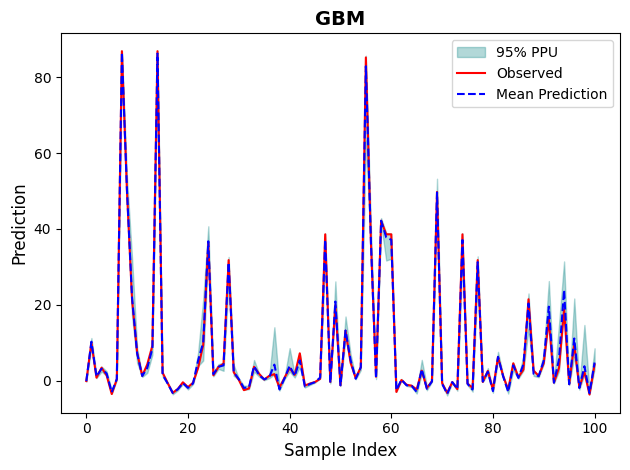

Processing model: XGB


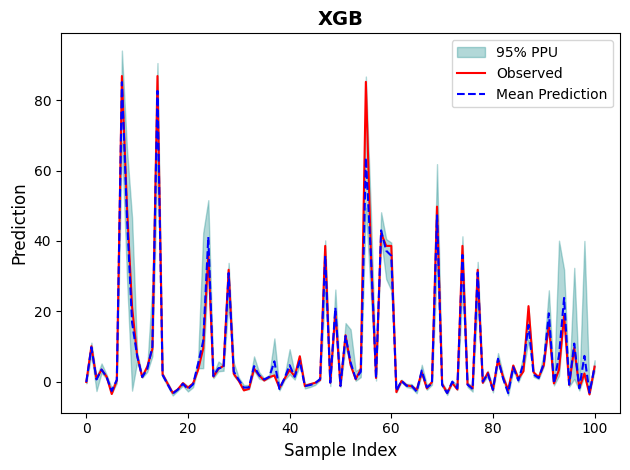

Streaming output truncated to the last 5000 lines.
225:	learn: 0.1020000	total: 450ms	remaining: 495ms
226:	learn: 0.1016949	total: 452ms	remaining: 493ms
227:	learn: 0.1014445	total: 454ms	remaining: 491ms
228:	learn: 0.1011911	total: 455ms	remaining: 489ms
229:	learn: 0.1009725	total: 457ms	remaining: 487ms
230:	learn: 0.1004706	total: 459ms	remaining: 485ms
231:	learn: 0.0998143	total: 461ms	remaining: 483ms
232:	learn: 0.0995829	total: 463ms	remaining: 481ms
233:	learn: 0.0994222	total: 465ms	remaining: 479ms
234:	learn: 0.0992935	total: 468ms	remaining: 477ms
235:	learn: 0.0988467	total: 469ms	remaining: 475ms
236:	learn: 0.0980020	total: 471ms	remaining: 473ms
237:	learn: 0.0974670	total: 473ms	remaining: 471ms
238:	learn: 0.0971439	total: 474ms	remaining: 468ms
239:	learn: 0.0969421	total: 476ms	remaining: 466ms
240:	learn: 0.0960811	total: 478ms	remaining: 464ms
241:	learn: 0.0958984	total: 479ms	remaining: 462ms
242:	learn: 0.0949818	total: 481ms	remaining: 459ms
243:	learn: 0

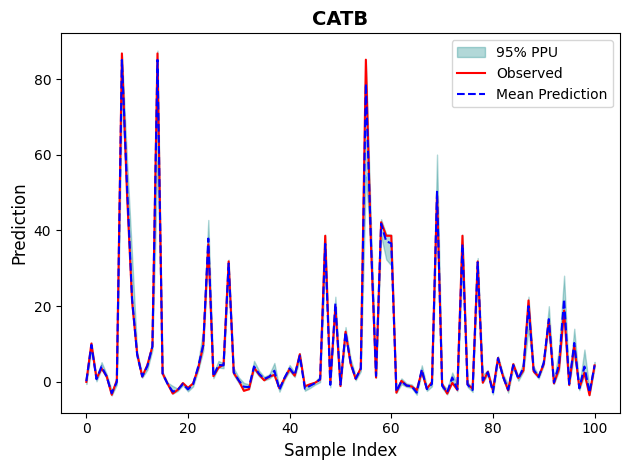

Processing model: XRT


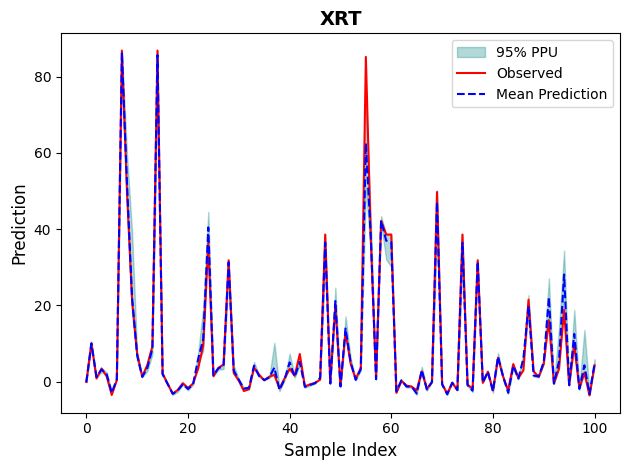

Processing model: RF


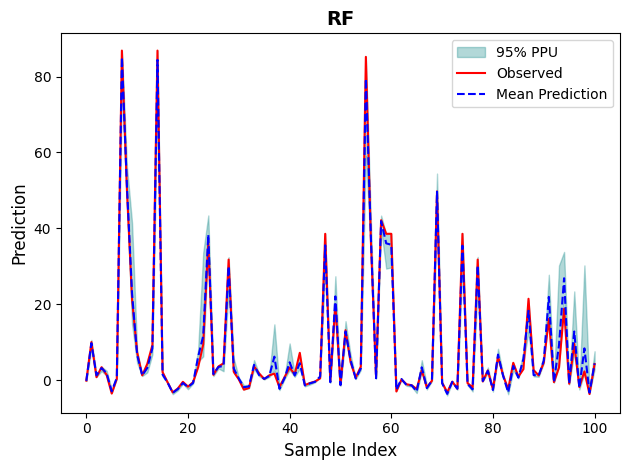


Uncertainty Metrics for GBM Model:
{'P-factor': np.float64(0.7920792079207921), 'R-factor': np.float64(0.1712928508318271), 'd-bar': np.float64(3.175105729629354), '95% PPU': np.float64(3.175105729629354)}

Uncertainty Metrics for XGB Model:
{'P-factor': np.float64(0.8712871287128713), 'R-factor': np.float32(0.36770543), 'd-bar': np.float32(6.815834), '95% PPU': np.float32(6.815834)}

Uncertainty Metrics for CATB Model:
{'P-factor': np.float64(0.9207920792079208), 'R-factor': np.float64(0.1756602088689294), 'd-bar': np.float64(3.2560596250173206), '95% PPU': np.float64(3.2560596250173206)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.5346534653465347), 'R-factor': np.float64(0.15319436145831763), 'd-bar': np.float64(2.8396298645923252), '95% PPU': np.float64(2.8396298645923252)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.6138613861386139), 'R-factor': np.float64(0.2188221843868308), 'd-bar': np.float64(4.056115407284371), '95% PPU': np.float64(4.0561

In [ ]:
run_bootstrap(X_train,y_train,X_test,y_test,models,n_iter=1000)

## Non Dimensional

In [ ]:
# Load and rename columns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/non_dim.csv")
df.columns = ['AR', 'phi', 'R/L', 'Fr', 'Qa/Qw', 'sigma']
X = df.drop(columns=['sigma'])
y = df['sigma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Processing model: GBM


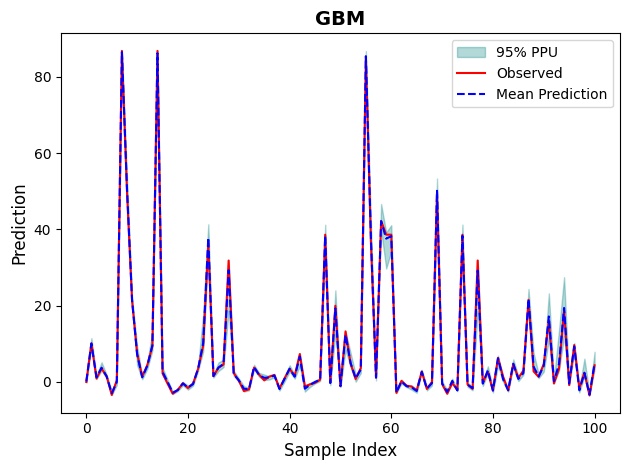

Processing model: XGB


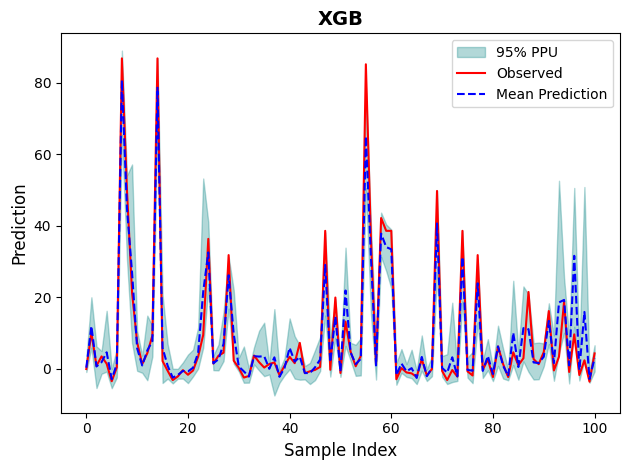

Streaming output truncated to the last 5000 lines.
225:	learn: 0.1115959	total: 415ms	remaining: 457ms
226:	learn: 0.1110590	total: 417ms	remaining: 455ms
227:	learn: 0.1102252	total: 420ms	remaining: 455ms
228:	learn: 0.1092697	total: 422ms	remaining: 453ms
229:	learn: 0.1084833	total: 423ms	remaining: 451ms
230:	learn: 0.1080027	total: 425ms	remaining: 449ms
231:	learn: 0.1079480	total: 427ms	remaining: 447ms
232:	learn: 0.1069901	total: 428ms	remaining: 445ms
233:	learn: 0.1068983	total: 430ms	remaining: 443ms
234:	learn: 0.1060602	total: 432ms	remaining: 441ms
235:	learn: 0.1055214	total: 433ms	remaining: 439ms
236:	learn: 0.1050448	total: 435ms	remaining: 437ms
237:	learn: 0.1045961	total: 437ms	remaining: 435ms
238:	learn: 0.1044621	total: 438ms	remaining: 433ms
239:	learn: 0.1037101	total: 440ms	remaining: 431ms
240:	learn: 0.1032374	total: 441ms	remaining: 429ms
241:	learn: 0.1026746	total: 443ms	remaining: 427ms
242:	learn: 0.1024192	total: 445ms	remaining: 425ms
243:	learn: 0

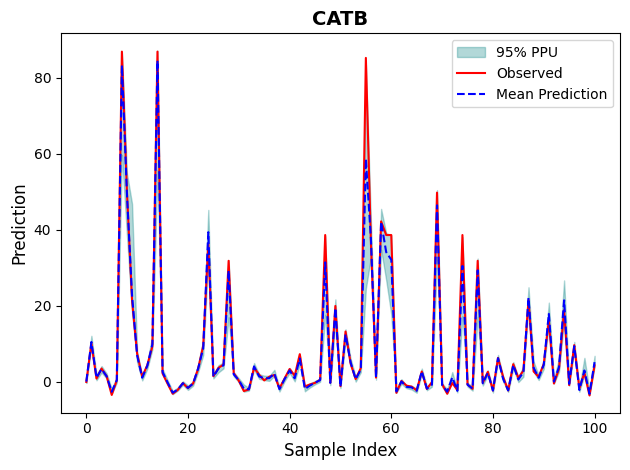

Processing model: XRT


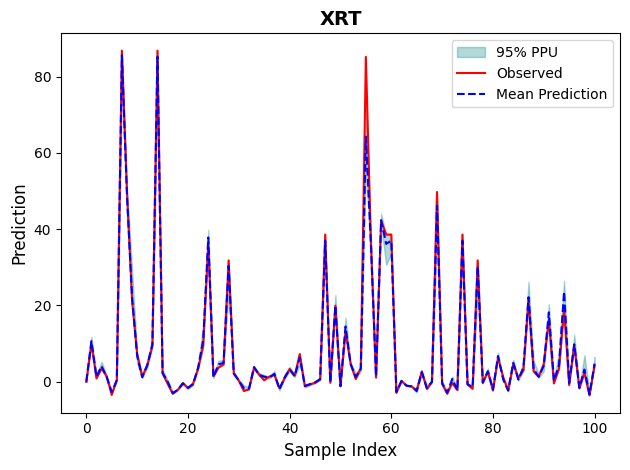

Processing model: RF


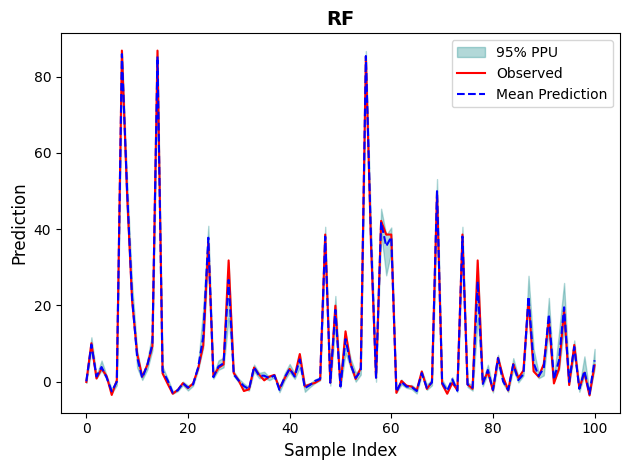


Uncertainty Metrics for GBM Model:
{'P-factor': np.float64(0.9207920792079208), 'R-factor': np.float64(0.15203227852015067), 'd-bar': np.float64(2.81808934975262), '95% PPU': np.float64(2.81808934975262)}

Uncertainty Metrics for XGB Model:
{'P-factor': np.float64(0.900990099009901), 'R-factor': np.float32(0.68675894), 'd-bar': np.float32(12.72985), '95% PPU': np.float32(12.72985)}

Uncertainty Metrics for CATB Model:
{'P-factor': np.float64(0.8910891089108911), 'R-factor': np.float64(0.25104054656668623), 'd-bar': np.float64(4.653319002529371), '95% PPU': np.float64(4.653319002529371)}

Uncertainty Metrics for XRT Model:
{'P-factor': np.float64(0.801980198019802), 'R-factor': np.float64(0.1260975574576174), 'd-bar': np.float64(2.337360112997525), '95% PPU': np.float64(2.337360112997525)}

Uncertainty Metrics for RF Model:
{'P-factor': np.float64(0.7425742574257426), 'R-factor': np.float64(0.16871568617956942), 'd-bar': np.float64(3.127335082962872), '95% PPU': np.float64(3.1273350829

In [ ]:
run_bootstrap(X_train,y_train,X_test,y_test,models,n_iter=1000)